In [3]:
# The code was removed by DSX for sharing.

In [4]:
library(ibmdbR)
library(ggplot2)
library(scales)
library(reshape2)
#install.packages("gmodels")
library(gmodels)
#install.packages("plyr")
library(plyr)
library(data.table)
library(magrittr)
library(dplyr)

Loading required package: RODBC
Loading required package: Matrix
Loading required package: arules

Attaching package: ‘arules’

The following objects are masked from ‘package:SparkR’:

    decode, encode, size

The following objects are masked from ‘package:base’:

    abbreviate, write


Attaching package: ‘scales’

The following object is masked from ‘package:SparkR’:

    date_format


Attaching package: ‘plyr’

The following objects are masked from ‘package:SparkR’:

    arrange, count, desc, join, mutate, rename, summarize, take


Attaching package: ‘data.table’

The following objects are masked from ‘package:reshape2’:

    dcast, melt

The following objects are masked from ‘package:SparkR’:

    between, first, hour, last, like, minute, month, quarter, second,
    tables, year

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
--------------------------------------------------------

In [5]:
con <- idaConnect(paste("DashDB", credentials_1["dsn"], sep=";"),'','')

In [6]:
idaInit(con)

In [7]:
churn <- idaQuery("SELECT T0.INDIVIDUAL_ID AS INDIVIDUAL_ID,T0.ACCT_SUSPD_DATE AS ACCT_SUSPD_DATE,T0.ADDRESS_ID AS ADDRESS_ID,T0.ZIP5 AS ZIP5,T0.LATITUDE AS LATITUDE,T0.LONGITUDE AS LONGITUDE,T0.CURR_ANN_AMT AS CURR_ANN_AMT,T0.CUST_TENURE AS CUST_TENURE,T0.INCOME AS INCOME,T0.AGE_IN_YEARS AS AGE_IN_YEARS,T0.HAS_CHILDREN AS HAS_CHILDREN,T0.LENGTH_OF_RESIDENCE AS LENGTH_OF_RESIDENCE,T0.MARITAL_STATUS AS MARITAL_STATUS,T0.HOME_OWNER_RENTER AS HOME_OWNER_RENTER,T0.NUMBER_OF_CHILDREN AS NUMBER_OF_CHILDREN,T0.HOME_MARKET_VALUE AS HOME_MARKET_VALUE,T0.HOME_OWNER AS HOME_OWNER,T0.NO_MARITAL_STATUS AS NO_MARITAL_STATUS,T0.COLLEGE_DEGREE AS COLLEGE_DEGREE,T0.GOOD_CREDIT AS GOOD_CREDIT,(CASE WHEN (T0.ACCT_SUSPD_DATE IS NULL) THEN 0 ELSE 1 END) AS CANCEL,(CASE WHEN ((CASE WHEN (T0.ACCT_SUSPD_DATE IS NULL) THEN 0 ELSE 1 END) = 1) THEN 'YES' ELSE 'NO' END) AS CHURN
 FROM (SELECT T0.INDIVIDUAL_ID AS INDIVIDUAL_ID,T0.ACCT_SUSPD_DATE AS ACCT_SUSPD_DATE,T0.ADDRESS_ID AS ADDRESS_ID,T0.ZIP5 AS ZIP5,T0.LATITUDE AS LATITUDE,T0.LONGITUDE AS LONGITUDE,T0.CURR_ANN_AMT AS CURR_ANN_AMT,T0.CUST_TENURE AS CUST_TENURE,T0.INCOME AS INCOME,T0.AGE_IN_YEARS AS AGE_IN_YEARS,T0.HAS_CHILDREN AS HAS_CHILDREN,T0.LENGTH_OF_RESIDENCE AS LENGTH_OF_RESIDENCE,T0.MARITAL_STATUS AS MARITAL_STATUS,T0.HOME_OWNER_RENTER AS HOME_OWNER_RENTER,T0.NUMBER_OF_CHILDREN AS NUMBER_OF_CHILDREN,T0.HOME_MARKET_VALUE AS HOME_MARKET_VALUE,T0.HOME_OWNER AS HOME_OWNER,T0.NO_MARITAL_STATUS AS NO_MARITAL_STATUS,T0.COLLEGE_DEGREE AS COLLEGE_DEGREE,T0.GOOD_CREDIT AS GOOD_CREDIT FROM DASH6055.CUSTOMER_SUMMARY T0 TABLESAMPLE BERNOULLI(10.000000)) T0")


In [8]:
head(churn)
dim(churn)

INDIVIDUAL_ID,ACCT_SUSPD_DATE,ADDRESS_ID,ZIP5,LATITUDE,LONGITUDE,CURR_ANN_AMT,CUST_TENURE,INCOME,AGE_IN_YEARS,...,MARITAL_STATUS,HOME_OWNER_RENTER,NUMBER_OF_CHILDREN,HOME_MARKET_VALUE,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,CANCEL,CHURN
221302202556,NA,521300795919,76182,NA,NA,1330.8254,3.300000,80372.18,55.44400,...,,O,NA,50000 - 74999,1,0,0,0,0,NO
221302202607,NA,521300795940,75214,32.82205,-96.75197,618.2552,17.697262,125000.00,45.13895,...,Married,O,2,125000 - 149999,1,0,0,1,0,NO
221302203504,NA,521300796272,75035,33.13103,-96.78111,734.5103,29.171458,125000.00,56.80767,...,Married,O,2,150000 - 174999,1,0,1,1,0,NO
221302203735,NA,521300796363,76148,32.86350,-97.25340,1112.9334,12.100000,47500.00,55.44400,...,Married,O,0,50000 - 74999,1,0,0,1,0,NO
221302204331,NA,521300796595,76002,32.64305,-97.10095,596.1840,9.610883,87500.00,35.38672,...,Single,O,NA,50000 - 74999,1,0,1,1,0,NO
221302204773,NA,521300796772,75208,32.75060,-96.83637,1025.3749,15.235318,80372.18,43.30459,...,,O,NA,100000 - 124999,1,0,1,1,0,NO


[1] 228000     22

In [9]:
zz <- CrossTable(churn$CHURN) 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228000 

 
          |        NO |       YES | 
          |-----------|-----------|
          |    200900 |     27100 | 
          |     0.881 |     0.119 | 
          |-----------|-----------|



 


In [10]:
yy <- data.frame(zz$t)


In [11]:
yy$total <- yy$NO + yy$YES
yy

NO,YES,total
200900,27100,228000


In [12]:
churn <- data.frame(churn)

In [13]:
churn$counter  <- 1


In [14]:
head(churn)

INDIVIDUAL_ID,ACCT_SUSPD_DATE,ADDRESS_ID,ZIP5,LATITUDE,LONGITUDE,CURR_ANN_AMT,CUST_TENURE,INCOME,AGE_IN_YEARS,...,HOME_OWNER_RENTER,NUMBER_OF_CHILDREN,HOME_MARKET_VALUE,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,CANCEL,CHURN,counter
221302202556,NA,521300795919,76182,NA,NA,1330.8254,3.300000,80372.18,55.44400,...,O,NA,50000 - 74999,1,0,0,0,0,NO,1
221302202607,NA,521300795940,75214,32.82205,-96.75197,618.2552,17.697262,125000.00,45.13895,...,O,2,125000 - 149999,1,0,0,1,0,NO,1
221302203504,NA,521300796272,75035,33.13103,-96.78111,734.5103,29.171458,125000.00,56.80767,...,O,2,150000 - 174999,1,0,1,1,0,NO,1
221302203735,NA,521300796363,76148,32.86350,-97.25340,1112.9334,12.100000,47500.00,55.44400,...,O,0,50000 - 74999,1,0,0,1,0,NO,1
221302204331,NA,521300796595,76002,32.64305,-97.10095,596.1840,9.610883,87500.00,35.38672,...,O,NA,50000 - 74999,1,0,1,1,0,NO,1
221302204773,NA,521300796772,75208,32.75060,-96.83637,1025.3749,15.235318,80372.18,43.30459,...,O,NA,100000 - 124999,1,0,1,1,0,NO,1


In [15]:
whoopie <-aggregate(churn$counter, by=list(churn$CHURN),
  FUN=sum, na.rm=TRUE)

In [16]:
whoopie

Group.1,x
NO,200900
YES,27100


In [17]:
setnames(whoopie, "x", "Count")
setnames(whoopie, "Group.1", "Churn")


In [18]:
whoopie

Churn,Count
NO,200900
YES,27100


In [19]:
doopie <- cbind(whoopie, yy$total)

In [20]:
doopie

Churn,Count,yy$total
NO,200900,228000
YES,27100,228000


In [21]:
setnames(doopie, "yy$total", "Total")

In [22]:
doopie

Churn,Count,Total
NO,200900,228000
YES,27100,228000


In [23]:
doopie <- cbind(whoopie, yy$total)

In [24]:
doopie

Churn,Count,yy$total
NO,200900,228000
YES,27100,228000


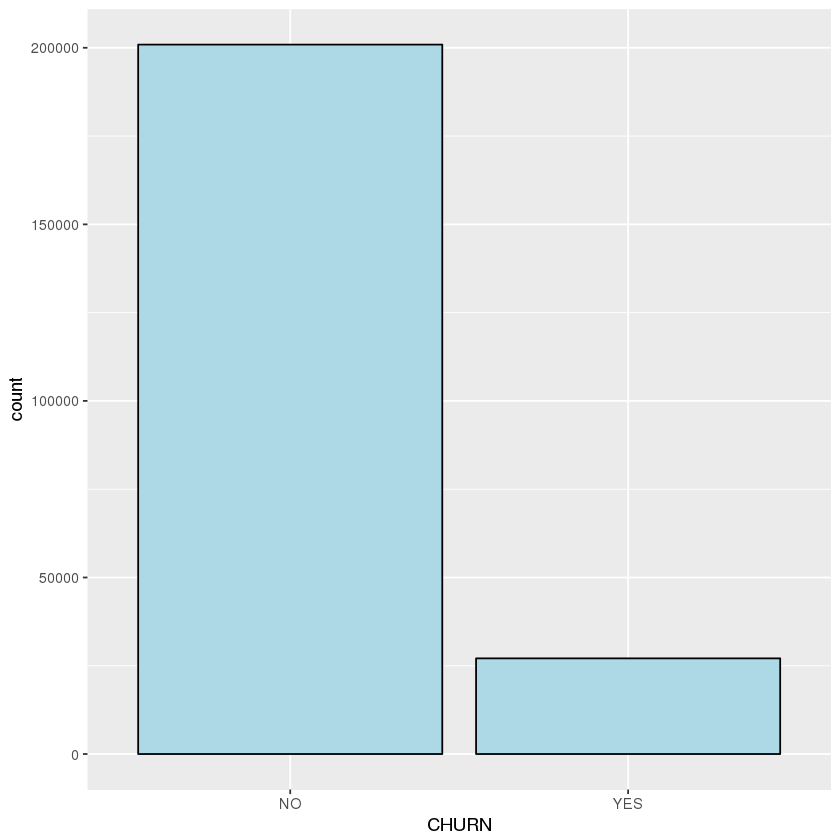

In [25]:
ggplot(churn, aes(x=CHURN )) + 
  geom_bar(fill='lightblue', color='black')

In [26]:
churn %>% mutate(percentile = ntile(CUST_TENURE, 500)) -> churn

In [27]:
churn$cancel <- ifelse(churn$CHURN=="YES", 1, 0)

In [ ]:
dingo <- ddply(churn,.(percentile),summarise,
                    cancel= mean(cancel), CUST_TENURE=mean(CUST_TENURE))

In [ ]:
ggplot(dingo, aes(x=CUST_TENURE, y=cancel)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth()   # Add linear regression line 
                             #  (by default includes 95% confidence region)


In [ ]:
churn %>% mutate(percentile = ntile(INCOME, 100)) -> churn

dingo <- ddply(churn,.(percentile),summarise,
                    cancel= mean(cancel), INCOME=mean(INCOME))


ggplot(dingo, aes(x=INCOME, y=cancel)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth()   # Add linear regression line 
                             #  (by default includes 95% confidence region)


In [ ]:

churn %>% mutate(percentile = ntile(LENGTH_OF_RESIDENCE, 100)) -> churn

dingo <- ddply(churn,.(percentile),summarise,
                    cancel= mean(cancel), LENGTH_OF_RESIDENCE=mean(LENGTH_OF_RESIDENCE))


ggplot(dingo, aes(x=LENGTH_OF_RESIDENCE, y=cancel)) +
    geom_point(shape=1) +    # Use hollow circles
    geom_smooth()   # Add linear regression line 
                             #  (by default includes 95% confidence region)


In [ ]:
churn$cancel <- churn$cancel*100

In [ ]:

mm <- ddply(churn, "HAS_CHILDREN", summarise, cancel = mean(cancel))
ggplot(mm, aes(x = factor(HAS_CHILDREN), y = cancel)) + geom_bar(stat = "identity",color="black", fill="blue") + 
scale_y_continuous(limits = c(0, 15), labels = dollar_format(suffix = "%", prefix = ""))

In [ ]:
mm <- ddply(churn, "MARITAL_STATUS", summarise, cancel = mean(cancel))
ggplot(mm, aes(x = factor(MARITAL_STATUS), y = cancel)) + geom_bar(stat = "identity" ,color="black", fill="blue") + 
scale_y_continuous(limits = c(0, 15), labels = dollar_format(suffix = "%", prefix = ""))

In [ ]:
mm <- ddply(churn, "HOME_OWNER_RENTER", summarise, cancel = mean(cancel))
ggplot(mm, aes(x = factor(HOME_OWNER_RENTER), y = cancel)) + geom_bar(stat = "identity" ,color="black", fill="blue") + 
scale_y_continuous(limits = c(0, 15), labels = dollar_format(suffix = "%", prefix = ""))